In [1]:
import matplotlib.pyplot as plt
import pandas as pd

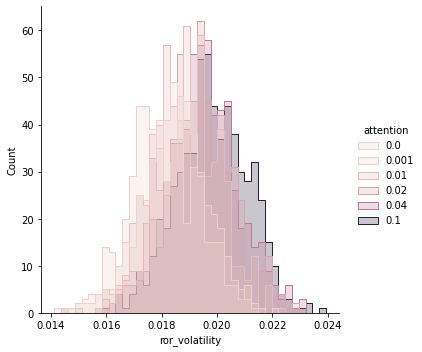

In [2]:
import seaborn as sns

rdata = pd.read_csv("out/study-AZURE-Jun-30.csv")
rdata = rdata.drop(columns="Unnamed: 0")

rdata["att_cat"] = rdata['attention'].apply(lambda x: str(x) + ' ')
rdata["mock"] = rdata['seconds'] < 100

data = rdata[~rdata["mock"]]
 
sns.displot(
    data, 
    x="ror_volatility", 
    hue="attention", 
    element='step'
)

array([[<AxesSubplot:title={'center':'seconds'}>]], dtype=object)

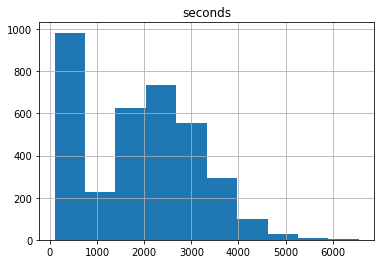

In [3]:
data[['seconds']].hist()

$Q$ number of quarters
$R$ runs per quarter
$G$ points on the grid
$N$ is samples per gridpoint.

We are collecting $GN$ samples. Runtime is (very) roughly proportional to $QR$

In [4]:
data[['q','r']]

,q,r
0,8,15
1,8,15
2,8,15
3,8,15
4,8,15
...,...,...
7491,8,15
7492,8,15
7493,8,15
7494,8,15


<AxesSubplot:xlabel='dividend_ror', ylabel='attention'>

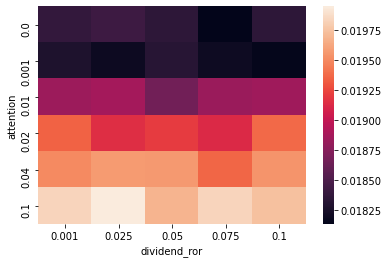

In [5]:
hdata_mean = pd.DataFrame(data.groupby(['attention','dividend_ror']).mean()['ror_volatility']).reset_index().pivot(
    index="attention",columns="dividend_ror", values="ror_volatility")

#hdata_std = pd.DataFrame(data.groupby(['attention','dividend_ror']).std()['ror_volatility']).reset_index().pivot(
#    index="attention",columns="dividend_ror", values="ror_volatility")

sns.heatmap(hdata_mean)

In [6]:
means = data.columns[:6]
stds = data.columns[6:12]

In [7]:
data[list(means) + ['attention', 'dividend_ror']]

,"('aLvl_mean', 'CRRA: 3.33, DiscFac: 0.95')","('aLvl_mean', 'CRRA: 3.33, DiscFac: 0.97')","('aLvl_mean', 'CRRA: 6.0, DiscFac: 0.95')","('aLvl_mean', 'CRRA: 6.0, DiscFac: 0.97')","('aLvl_mean', 'CRRA: 8.67, DiscFac: 0.95')","('aLvl_mean', 'CRRA: 8.67, DiscFac: 0.97')",attention,dividend_ror
0,0.931892,0.945508,0.881908,1.056958,1.394624,1.383918,0.0,0.001
1,0.984269,0.868498,1.318427,1.312531,1.512109,1.521912,0.0,0.001
2,0.990556,1.012809,1.287227,1.286152,1.530965,1.552315,0.0,0.001
3,0.874937,0.823574,0.980909,1.052724,1.123485,1.131546,0.0,0.001
4,1.028841,1.042113,1.405751,1.388985,1.668436,1.648286,0.0,0.001
...,...,...,...,...,...,...,...,...
7491,0.669533,0.609085,0.857295,0.810239,1.011973,0.841189,0.1,0.100
7492,1.310576,1.116067,1.561679,1.608896,1.696020,1.833229,0.1,0.100
7493,0.795670,0.873106,1.186337,1.002924,1.042613,1.300522,0.1,0.100
7494,1.575904,1.632042,1.858621,2.009879,2.321492,2.388004,0.1,0.100


In [8]:
mdata_mean = pd.melt(
    data[list(means) + ['attention']], 
    id_vars=['attention'], 
    value_vars=list(data.columns[:6]),
    var_name="stat"
)

mdata_std = pd.melt(
    data[list(stds) + ['attention']], 
    id_vars=['attention'], 
    value_vars=list(data.columns[6:12]),
    var_name="stat"
)

<AxesSubplot:xlabel='attention', ylabel='value'>

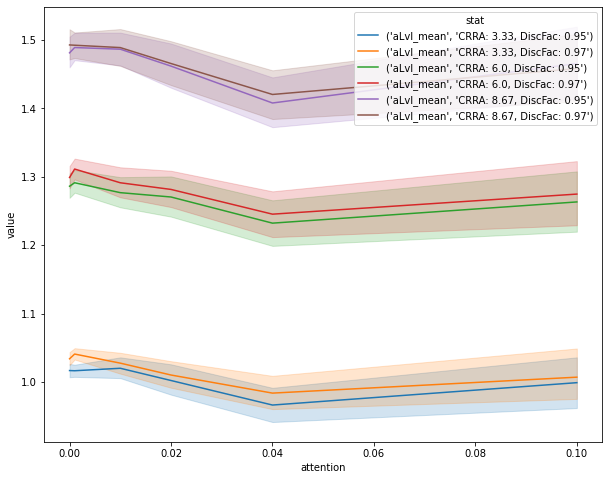

In [9]:
fig, ax = plt.subplots(figsize=(10,8))
sns.lineplot(
    ax=ax,
    data=mdata_mean,
    x="attention",
    y="value",
    hue="stat")

<AxesSubplot:xlabel='attention', ylabel='value'>

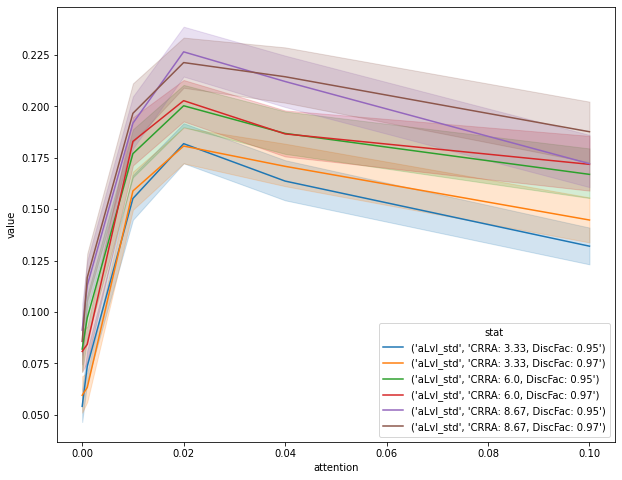

In [10]:
fig, ax = plt.subplots(figsize=(10,8))
sns.lineplot(
    ax=ax,
    data=mdata_std,
    x="attention",
    y="value",
    hue="stat")

<AxesSubplot:xlabel='dividend_ror', ylabel='value'>

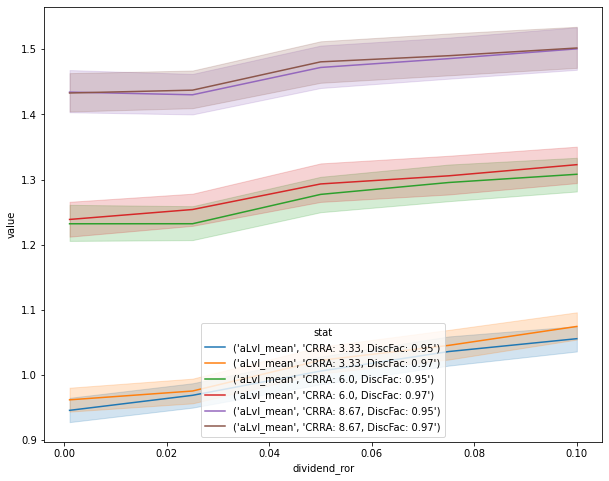

In [11]:
mdata_mean_div = pd.melt(
    data[list(means) + ['dividend_ror']], 
    id_vars=['dividend_ror'], 
    value_vars=list(data.columns[:6]),
    var_name="stat"
)

fig, ax = plt.subplots(figsize=(10,8))
sns.lineplot(
    ax=ax,
    data=mdata_mean_div,
    x="dividend_ror",
    y="value",
    hue="stat")

<AxesSubplot:xlabel='attention', ylabel='ror_volatility'>

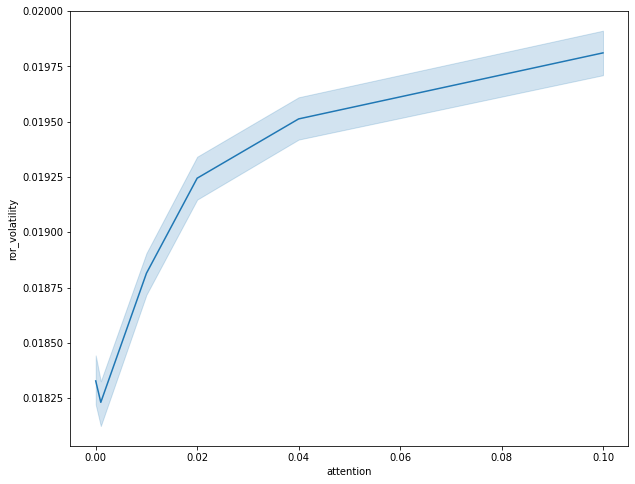

In [12]:
fig, ax = plt.subplots(figsize=(10,8))
sns.lineplot(
    ax=ax,
    data=data,
    x="attention",
    y="ror_volatility")

In [13]:
data['dstats'] = data['dividend_ror'].apply(lambda x : 'ror:' + str(x)) + data['dividend_std'].apply(lambda x : 'std:' + str(x))

<ipython-input-13-99b8925b092b>:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['dstats'] = data['dividend_ror'].apply(lambda x : 'ror:' + str(x)) + data['dividend_std'].apply(lambda x : 'std:' + str(x))


<AxesSubplot:xlabel='dividend_ror', ylabel='ror_volatility'>

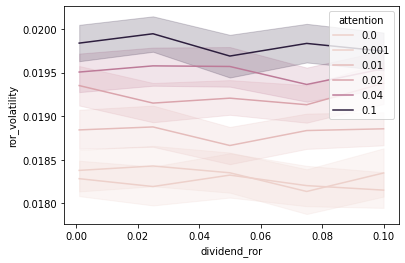

In [14]:
sns.lineplot(
    data = data,
    x = 'dividend_ror',
    y = 'ror_volatility',
    hue = 'attention'
)

<AxesSubplot:xlabel='attention', ylabel='ror_volatility'>

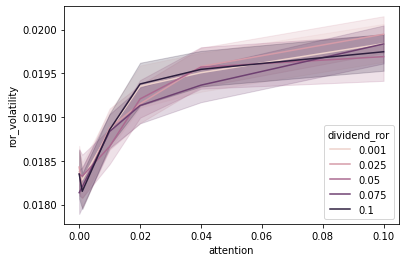

In [15]:
sns.lineplot(
    data = data,
    x = 'attention',
    y = 'ror_volatility',
    hue = 'dividend_ror'
)

In [16]:
data

,"('aLvl_mean', 'CRRA: 3.33, DiscFac: 0.95')","('aLvl_mean', 'CRRA: 3.33, DiscFac: 0.97')","('aLvl_mean', 'CRRA: 6.0, DiscFac: 0.95')","('aLvl_mean', 'CRRA: 6.0, DiscFac: 0.97')","('aLvl_mean', 'CRRA: 8.67, DiscFac: 0.95')","('aLvl_mean', 'CRRA: 8.67, DiscFac: 0.97')","('aLvl_std', 'CRRA: 3.33, DiscFac: 0.95')","('aLvl_std', 'CRRA: 3.33, DiscFac: 0.97')","('aLvl_std', 'CRRA: 6.0, DiscFac: 0.95')","('aLvl_std', 'CRRA: 6.0, DiscFac: 0.97')",...,market_class,market_seeds,attention,ror_volatility,dividend_ror,dividend_std,seconds,att_cat,mock,dstats
0,0.931892,0.945508,0.881908,1.056958,1.394624,1.383918,0.012216,0.018802,0.446000,0.340779,...,<class 'hark_portfolio_agents.MarketPNL'>,"[871, 1316, 1027, 754, 485, 1127, 1272, 357, 8...",0.0,0.018764,0.001,0.01,258,0.0,False,ror:0.001std:0.01
1,0.984269,0.868498,1.318427,1.312531,1.512109,1.521912,0.024519,0.311292,0.024387,0.023322,...,<class 'hark_portfolio_agents.MarketPNL'>,"[982, 1145, 887, 328, 1133, 1261, 809, 164, 51...",0.0,0.015916,0.001,0.01,303,0.0,False,ror:0.001std:0.01
2,0.990556,1.012809,1.287227,1.286152,1.530965,1.552315,0.046604,0.027934,0.039027,0.056683,...,<class 'hark_portfolio_agents.MarketPNL'>,"[913, 29, 1442, 20, 1464, 857, 492, 266, 666, ...",0.0,0.017000,0.001,0.01,366,0.0,False,ror:0.001std:0.01
3,0.874937,0.823574,0.980909,1.052724,1.123485,1.131546,0.026791,0.173780,0.033701,0.046201,...,<class 'hark_portfolio_agents.MarketPNL'>,"[1, 719, 1418, 289, 1214, 273, 571, 1480, 669,...",0.0,0.017984,0.001,0.01,443,0.0,False,ror:0.001std:0.01
4,1.028841,1.042113,1.405751,1.388985,1.668436,1.648286,0.020632,0.026693,0.058860,0.068436,...,<class 'hark_portfolio_agents.MarketPNL'>,"[470, 387, 231, 828, 702, 1198, 388, 875, 519,...",0.0,0.017084,0.001,0.01,172,0.0,False,ror:0.001std:0.01
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7491,0.669533,0.609085,0.857295,0.810239,1.011973,0.841189,0.116768,0.065675,0.049518,0.040903,...,<class 'hark_portfolio_agents.MarketPNL'>,"[937, 127, 560, 960, 115, 1142, 318, 1283, 383...",0.1,0.019468,0.100,0.01,2166,0.1,False,ror:0.1std:0.01
7492,1.310576,1.116067,1.561679,1.608896,1.696020,1.833229,0.131846,0.491140,0.118280,0.098994,...,<class 'hark_portfolio_agents.MarketPNL'>,"[1110, 1449, 1392, 538, 1103, 568, 1177, 159, ...",0.1,0.020503,0.100,0.01,1652,0.1,False,ror:0.1std:0.01
7493,0.795670,0.873106,1.186337,1.002924,1.042613,1.300522,0.077219,0.095935,0.154170,0.088703,...,<class 'hark_portfolio_agents.MarketPNL'>,"[1229, 865, 284, 514, 567, 387, 898, 27, 208, ...",0.1,0.019419,0.100,0.01,1385,0.1,False,ror:0.1std:0.01
7494,1.575904,1.632042,1.858621,2.009879,2.321492,2.388004,0.093621,0.085418,0.092500,0.255110,...,<class 'hark_portfolio_agents.MarketPNL'>,"[1421, 1356, 790, 1245, 1223, 387, 1278, 944, ...",0.1,0.017806,0.100,0.01,1146,0.1,False,ror:0.1std:0.01
